# Building a neural network from scratch
Implementing a simple two layer newral network using only numpy to recognise handwritten digits (MNIST data)

Importing dependencies 
* numpy for array manupaltion
* pandas to read csv
* matplotlib to shoe the images
* tqdm to show progress of traning


In [4]:
import numpy as np
import pandas as pd   
from matplotlib import pyplot as plt
from tqdm import tqdm

Load data

In [5]:
train = pd.read_csv(r".\train.csv")
test = pd.read_csv(r".\test.csv")

Prep data

In [6]:
train = np.array(train)
m, n = train.shape  
np.random.shuffle(train) 
data_train = train.T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

test = np.array(test)
m_test , n_test = test.shape
X_test = test.T
X_test = X_test / 255.

Define the functions for the newral network
* init_params to initialise weights and biases of the nodes
* ReLU and softmax as the activation functions
* forward_prop if forward propagation through the network
* one_hot to encode the output value
* backward_prop is to calculate the derivatives in back propogation through the network
* update_params is to update the new values for the weights and biases

In [7]:
def init_params():
    hiddenlayer = 12
    W1 = np.random.randn(hiddenlayer, 784) * np.sqrt(2/784)
    b1 = np.zeros((hiddenlayer, 1))
    W2 = np.random.randn(10, hiddenlayer) * np.sqrt(2/hiddenlayer)
    b2 = np.zeros((10, 1))   
    return W1, b1, W2, b2

In [8]:
def ReLU(Z):
    return np.maximum(Z, 0)
def ReLU_deriv(Z):
    return Z > 0
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [9]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [10]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [11]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_y = one_hot(Y)

    dZ2 = A2 - one_hot_y
    dW2 = dZ2.dot(A1.T) / m
    db2 = np.sum(dZ2) / m

    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = dZ1.dot(X.T) / m
    db1 = np.sum(dZ1) / m
    return dW1, db1, dW2, db2

In [12]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

Training the network
This is just applying forward and backward pass on the data to update the weights and biases to get more accurate as the number of epochs 

In [13]:
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def trainNN(X, Y, alpha, epochs):
    W1, b1, W2, b2 = init_params()
    step = 1
    loop = tqdm(range(epochs))
    for epoch in loop:
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if step % 10 == 0:
            acc=(get_accuracy(np.argmax(A2, 0), Y))
            loop.set_postfix(accuracy=acc)
        step += 1
    return W1, b1, W2, b2

In [14]:
learning_rate = 0.069
epochs = 1069
W1, b1, W2, b2 = trainNN(X_train, Y_train, alpha=learning_rate, epochs=epochs)

100%|██████████| 1069/1069 [01:20<00:00, 13.35it/s, accuracy=0.919]


In [15]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    pred = np.argmax(A2, 0)
    return pred


Testing the network. seeing what predictions the network made on certain images

Prediction:  [8]
Label:  8


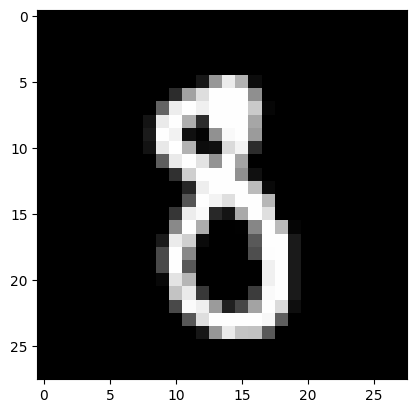

Prediction:  [8]
Label:  5


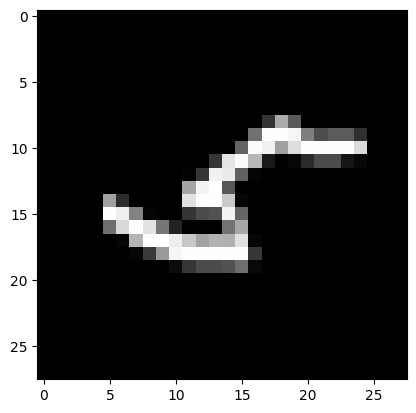

In [16]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    
for i in range(2):
    test_prediction(i, W1, b1, W2, b2)


Submission

In [17]:
sub_pred = make_predictions(X_test, W1, b1, W2, b2)
sub = pd.read_csv(r'.\sample_submission.csv')
sub['Label'] = sub_pred
sub.to_csv('MNIST1.csv', index = False)
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
